In [2]:
import networkx as nx
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

In [3]:
# 그래프를 생성합니다.
import networkx as nx

G = nx.Graph()

In [4]:
# 1 노드를 추가합니다.
G.add_node(1)

In [5]:
# 'p' 노드를 추가합니다.
G.add_node('p')

In [6]:
# 복수개의 노드를 한번에 추가합니다
G.add_nodes_from([2, 3, 9, 8, 10])

In [7]:
# 1 노드와 2 노드를 잇는 엣지를 추가합니다.
G.add_edge(1, 2)

In [8]:
# 튜플을 unpack 하는 형태로 엣지를 추가할 수도 있습니다. 2 노드와 3노드를 잇는 엣지를 추가합니다.
e = (2, 3)
G.add_edge(*e)

In [9]:
# 여러 엣지를 한번에 추가할 수도 있습니다
G.add_edges_from([('p', 2), (1, 3), (9, 8), (8, 10)])

In [10]:
# 노드의 갯수와 엣지를 확인해봅시다.
print(G.number_of_nodes())
print(G.number_of_edges())

7
6


In [11]:
# 노드 리스트 확인하기
list(G.nodes)

[1, 'p', 2, 3, 9, 8, 10]

In [12]:
# 엣지 리스트 확인하기
list(G.edges)

[(1, 2), (1, 3), ('p', 2), (2, 3), (9, 8), (8, 10)]

In [13]:
# 1번 노드와 연결된 노드
list(G.adj[1])

[2, 3]

In [14]:
# 노드와 연결된 엣지 갯수를 해당 노드의 degree라고 부릅니다.
# 1 번 노드의 degree 출력하기
G.degree[1]

2

In [15]:
# 2와 3 노드에 연결된 모든 엣지 데이터 가져오기
G.edges([2, 3])

EdgeDataView([(2, 1), (2, 3), (2, 'p'), (3, 1)])

In [16]:
# 1,2,3 노드의 degree 정보 가져오기
G.degree([1, 2, 3])

DegreeView({1: 2, 2: 3, 3: 2})

In [17]:
# 1 노드를 제거 해봅니다
print('제거 전 ', list(G.nodes))
G.remove_node(1)
print('제거 후 ', list(G.nodes))

제거 전  [1, 'p', 2, 3, 9, 8, 10]
제거 후  ['p', 2, 3, 9, 8, 10]


In [18]:
# 여러 노드를 제거 해봅니다
print('제거 전 ', list(G.nodes))
G.remove_nodes_from(['p', 3])
print('제거 후 ', list(G.nodes))

제거 전  ['p', 2, 3, 9, 8, 10]
제거 후  [2, 9, 8, 10]


In [19]:
# 엣지 제거하기
print(list(G.edges))
G.remove_edge(8, 10)
print(list(G.edges))

[(9, 8), (8, 10)]
[(9, 8)]


### 노드와 엣지에 속성 부여

In [20]:
# 그래프를 생성합니다
G.add_edges_from([('p', 2), (1, 3), (9, 8), (8, 10)])

In [21]:
# 1 노드와 3 노드에 'friend' 라는 'relation' 속성을 추가합니다. (엣지속성)
G = nx.Graph([(1, 3, {"relation": "friend"})])

In [22]:
# 추가된 결과는 다양한 방식으로 확인할 수 있습니다.
print(G[1])
print(G[1][3])
print(G.edges[1, 3])

{3: {'relation': 'friend'}}
{'relation': 'friend'}
{'relation': 'friend'}


In [23]:
# 또 다른 엣지 속성 부여하기
G.edges[1, 3]['since'] = 2020
G.edges[1, 3]['number_of_times met'] = 8
print(G.edges[1, 3])

{'relation': 'friend', 'since': 2020, 'number_of_times met': 8}


In [24]:
# 가중치(weight)를 부여한 그래프 순회하기
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    print('\n노드 ', n)
    print('인접 노드  ', nbrs.items())


노드  1
인접 노드   ItemsView(AtlasView({2: {'weight': 0.125}, 3: {'weight': 0.75}}))

노드  2
인접 노드   ItemsView(AtlasView({1: {'weight': 0.125}, 4: {'weight': 1.2}}))

노드  3
인접 노드   ItemsView(AtlasView({1: {'weight': 0.75}, 4: {'weight': 0.375}}))

노드  4
인접 노드   ItemsView(AtlasView({2: {'weight': 1.2}, 3: {'weight': 0.375}}))


In [25]:
# 가중치가 0.5 미만인 노드 출력하기
for nbr, edge_attr in nbrs.items():
    wt = edge_attr['weight']
    if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(4, 3, 0.375)


In [26]:
G.adj.items()

ItemsView(AdjacencyView({1: {3: {'relation': 'friend', 'since': 2020, 'number_of_times met': 8}}, 3: {1: {'relation': 'friend', 'since': 2020, 'number_of_times met': 8}}}))

In [27]:
# 노드 속성
G.add_node(1, age=28)
G.add_nodes_from([3,2], age=26)

In [28]:
# 노드 속성 확인하기
G.nodes.data()

NodeDataView({1: {'age': 28}, 3: {'age': 26}, 2: {'age': 26}})

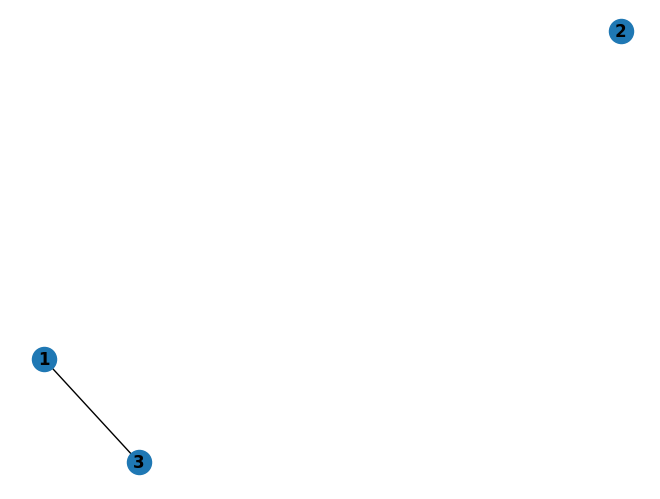

In [29]:
# 시각화 하기
nx.draw(G, with_labels=True, font_weight='bold')

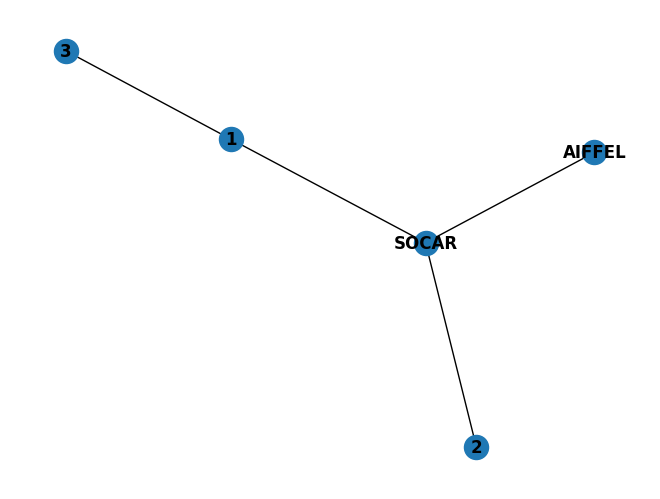

In [30]:
# 데이터 추가 후 시각화하기
G.add_edge('SOCAR', 2)
G.add_edge(1, 'SOCAR')
G.add_edge('SOCAR', 'AIFFEL')
nx.draw(G, with_labels=True, font_weight='bold')

* 해당 그래프는 관계의 방향성이 없기 때문에 무형그래프 라고 함

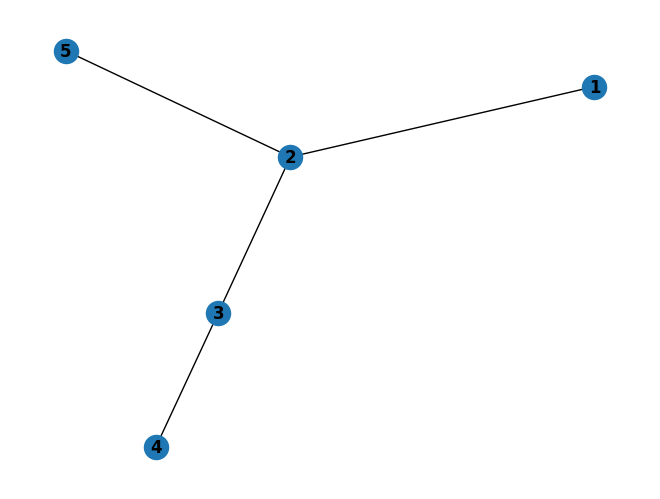

In [31]:
x = [1,2,3,4,5]
A = nx.Graph()

A.add_nodes_from(x)
A.add_edges_from([(1,2), (3,4), (2,5), (2,3)])
nx.draw(A, with_labels=True, font_weight='bold')